# Restaurant Revenue Prediction

In [1]:
# loading libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date

In [2]:
# Importing the dataset
dataset = pd.read_csv('train_r.csv')
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [3]:
print(X)

      Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0      0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1      1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2      2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3      3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4      4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   
..   ...         ...         ...         ...  ...  ..  ...  ...  ...  ..  ...   
132  132  06/25/2008     Trabzon       Other   FC   2  3.0  3.0  5.0   4  ...   
133  133  10/12/2006       İzmir  Big Cities   FC   4  5.0  4.0  4.0   2  ...   
134  134  07/08/2006     Kayseri       Other   FC   3  4.0  4.0  4.0   2  ...   
135  135  10/29/2010    İstanbul  Big Cities   FC   4  5.0  4.0  5.0   2  ...   
136  136  09/01/2009    İstanbul  Big Cities   FC   4  5.0  3.0  5.0   2  ...   

     P28  P29  P30  P31  P3

In [4]:
print(y)

0      5653753.0
1      6923131.0
2      2055379.0
3      2675511.0
4      4316715.0
         ...    
132    5787594.0
133    9262754.0
134    2544857.0
135    7217634.0
136    6363241.0
Name: revenue, Length: 137, dtype: float64


In [5]:
X = X.iloc[:,1:]
X

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,2.0,3.0,5,3,4,5,5,4,3,4
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,3.0,0,0,0,0,0,0,0,0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,1.0,3.0,0,0,0,0,0,0,0,0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,2.5,7.5,25,12,10,6,18,12,12,6
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,1.0,3.0,5,1,3,2,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,...,2.0,3.0,0,0,0,0,0,0,0,0
133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,...,3.0,3.0,0,0,0,0,0,0,0,0
134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,...,2.0,3.0,0,0,0,0,0,0,0,0
135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,...,3.0,3.0,0,0,0,0,0,0,0,0


In [6]:
X['Open Date'] = abs((pd.to_datetime(X['Open Date']) - pd.to_datetime('today').normalize()).dt.days)
X

,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,8523,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,2.0,3.0,5,3,4,5,5,4,3,4
1,5389,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,...,3.0,3.0,0,0,0,0,0,0,0,0
2,3539,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,...,1.0,3.0,0,0,0,0,0,0,0,0
3,3940,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,...,2.5,7.5,25,12,10,6,18,12,12,6
4,4939,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,...,1.0,3.0,5,1,3,2,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,5257,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,...,2.0,3.0,0,0,0,0,0,0,0,0
133,5879,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,...,3.0,3.0,0,0,0,0,0,0,0,0
134,5975,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,...,2.0,3.0,0,0,0,0,0,0,0,0
135,4401,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,...,3.0,3.0,0,0,0,0,0,0,0,0


In [7]:
X.iloc[:,0]

0      8523
1      5389
2      3539
3      3940
4      4939
       ... 
132    5257
133    5879
134    5975
135    4401
136    4824
Name: Open Date, Length: 137, dtype: int64

## Preprocessing

In [8]:
# Taking care of missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [9]:
# Encoding the Independent Variable
X = pd.get_dummies(X)
X.head(5)

,Open Date,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,City_Trabzon,City_Uşak,City_İstanbul,City_İzmir,City_Şanlıurfa,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
0,8523,4,5.0,4.0,4.0,2,2,5,4,5,...,0,0,1,0,0,1,0,0,0,1
1,5389,4,5.0,4.0,4.0,1,2,5,5,5,...,0,0,0,0,0,1,0,0,1,0
2,3539,2,4.0,2.0,5.0,2,3,5,5,5,...,0,0,0,0,0,0,1,0,0,1
3,3940,6,4.5,6.0,6.0,4,4,10,8,10,...,0,0,0,0,0,0,1,0,0,1
4,4939,3,4.0,3.0,4.0,2,2,5,5,5,...,0,0,0,0,0,0,1,0,0,1


In [10]:
feature_list = list(X.columns)
X

,Open Date,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,City_Trabzon,City_Uşak,City_İstanbul,City_İzmir,City_Şanlıurfa,City Group_Big Cities,City Group_Other,Type_DT,Type_FC,Type_IL
0,8523,4,5.0,4.0,4.0,2,2,5,4,5,...,0,0,1,0,0,1,0,0,0,1
1,5389,4,5.0,4.0,4.0,1,2,5,5,5,...,0,0,0,0,0,1,0,0,1,0
2,3539,2,4.0,2.0,5.0,2,3,5,5,5,...,0,0,0,0,0,0,1,0,0,1
3,3940,6,4.5,6.0,6.0,4,4,10,8,10,...,0,0,0,0,0,0,1,0,0,1
4,4939,3,4.0,3.0,4.0,2,2,5,5,5,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,5257,2,3.0,3.0,5.0,4,2,4,4,4,...,1,0,0,0,0,0,1,0,1,0
133,5879,4,5.0,4.0,4.0,2,3,5,4,4,...,0,0,0,1,0,1,0,0,1,0
134,5975,3,4.0,4.0,4.0,2,3,5,5,5,...,0,0,0,0,0,0,1,0,1,0
135,4401,4,5.0,4.0,5.0,2,2,5,5,5,...,0,0,1,0,0,1,0,0,1,0


In [11]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X)
X = pd.DataFrame(X)
y = [(revenue - min(y))/(max(y) - min(y)) for revenue in y]
X

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,0.819966,0.272727,0.615385,0.533333,0.222222,0.142857,0.111111,0.444444,0.333333,0.166667,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.335651,0.272727,0.615385,0.533333,0.222222,0.000000,0.111111,0.444444,0.444444,0.166667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.049760,0.090909,0.461538,0.266667,0.444444,0.142857,0.222222,0.444444,0.444444,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.111729,0.454545,0.538462,0.800000,0.666667,0.428571,0.333333,1.000000,0.777778,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.266110,0.181818,0.461538,0.400000,0.222222,0.142857,0.111111,0.444444,0.444444,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.315253,0.090909,0.307692,0.400000,0.444444,0.428571,0.111111,0.333333,0.333333,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
133,0.411374,0.272727,0.615385,0.533333,0.222222,0.142857,0.222222,0.444444,0.333333,0.000000,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
134,0.426209,0.181818,0.461538,0.533333,0.222222,0.142857,0.222222,0.444444,0.444444,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
135,0.182970,0.272727,0.615385,0.533333,0.444444,0.142857,0.111111,0.444444,0.444444,0.166667,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [13]:
print(X_train)

           0         1         2         3         4         5         6   \
93   0.072323  0.181818  0.461538  0.533333  0.222222  0.000000  0.111111   
66   0.228249  0.090909  0.153846  0.533333  0.000000  0.000000  0.000000   
109  0.362386  0.090909  0.461538  0.400000  0.444444  0.428571  0.444444   
123  0.125483  0.000000  0.000000  0.533333  0.000000  0.000000  0.000000   
42   0.131510  1.000000  1.000000  0.800000  0.666667  0.428571  0.333333   
..        ...       ...       ...       ...       ...       ...       ...   
129  0.392984  0.272727  0.615385  0.666667  0.222222  0.142857  0.111111   
79   0.225777  0.272727  0.615385  0.533333  0.000000  0.000000  0.222222   
133  0.411374  0.272727  0.615385  0.533333  0.222222  0.142857  0.222222   
72   0.252511  0.181818  0.615385  0.533333  0.222222  0.142857  0.111111   
37   0.193324  0.090909  0.307692  0.533333  0.000000  0.000000  0.444444   

           7         8         9   ...   67   68   69   70   71   72   73  

In [14]:
print(X_test)

           0         1         2         3         4         5         6   \
80   0.241385  0.272727  0.615385  0.533333  0.444444  0.000000  0.222222   
5    0.222995  0.454545  0.769231  0.600000  1.000000  1.000000  1.000000   
39   0.272601  0.272727  0.615385  0.533333  0.222222  0.142857  0.222222   
36   0.322516  0.181818  0.615385  0.666667  0.000000  0.000000  0.444444   
35   1.000000  0.272727  0.615385  0.533333  0.000000  0.000000  0.111111   
58   0.101066  0.181818  0.461538  0.533333  0.444444  0.142857  0.111111   
44   0.524030  0.090909  0.307692  0.666667  0.000000  0.000000  0.444444   
77   0.014217  0.181818  0.615385  0.400000  0.444444  0.285714  0.333333   
120  0.137691  0.090909  0.307692  0.533333  0.222222  0.142857  0.111111   
119  0.003400  0.272727  0.615385  0.533333  0.222222  0.142857  0.222222   
19   0.138000  0.090909  0.461538  0.533333  0.222222  0.142857  0.111111   
92   0.634060  1.000000  1.000000  1.000000  0.666667  0.142857  1.000000   

In [15]:
print(y_train)

[0.12190648560157942, 0.039481224769261386, 0.16549207855969048, 0.16788415463381304, 0.2050127165645418, 0.18881668041457117, 0.19575799281277273, 0.3066044020216887, 0.12414425157958921, 0.03152864746445921, 0.04882221552095374, 0.07521333963873214, 0.06548786765175672, 0.2165714162167618, 0.1403464342533044, 0.06653180618457827, 0.09937952999473933, 0.14203645869867632, 0.08562981029509299, 0.06689272574550728, 0.15451923967069944, 0.2230186343729028, 0.1671901905363052, 0.45842715094228637, 0.16912510542770937, 0.11447474530881402, 0.23458951923886195, 0.1620506722652512, 0.1321285320068632, 0.006503938708590559, 0.146733373343249, 0.14329088871131065, 0.139928578472426, 0.15910956065349194, 0.11387535140997211, 0.06442090661333065, 0.23248039892448774, 0.41757153111362233, 0.2810886722856318, 0.23105569942075485, 0.09970297732757666, 0.156513301373926, 0.13050698199268035, 0.178888534894651, 0.8302764172603229, 0.6699362578529254, 0.11316019798060815, 0.12003379078386994, 0.342114

In [16]:
print(y_test)

[0.1389704216876532, 0.20852076411642184, 0.14386019699392932, 0.1012772961593015, 0.14848782845418865, 0.09999202569419459, 0.1679136471644118, 0.04070573091629734, 0.15731305038008972, 0.14180941473825326, 0.04701896563818251, 0.3036897635955309, 0.12375033489118954, 0.3808501494225314, 0.048998254117672176, 0.12273092853647118, 0.3263002903585467, 0.2396819141612079, 0.03268435567905635, 0.2596810849196711, 0.34735418302482185, 1.0, 0.11850373770648073, 0.2989651356772329, 0.3122489596604186, 0.0658504047189343, 0.17074638585751745, 0.2500515849701104]


In [17]:
print(X_train)

           0         1         2         3         4         5         6   \
93   0.072323  0.181818  0.461538  0.533333  0.222222  0.000000  0.111111   
66   0.228249  0.090909  0.153846  0.533333  0.000000  0.000000  0.000000   
109  0.362386  0.090909  0.461538  0.400000  0.444444  0.428571  0.444444   
123  0.125483  0.000000  0.000000  0.533333  0.000000  0.000000  0.000000   
42   0.131510  1.000000  1.000000  0.800000  0.666667  0.428571  0.333333   
..        ...       ...       ...       ...       ...       ...       ...   
129  0.392984  0.272727  0.615385  0.666667  0.222222  0.142857  0.111111   
79   0.225777  0.272727  0.615385  0.533333  0.000000  0.000000  0.222222   
133  0.411374  0.272727  0.615385  0.533333  0.222222  0.142857  0.222222   
72   0.252511  0.181818  0.615385  0.533333  0.222222  0.142857  0.111111   
37   0.193324  0.090909  0.307692  0.533333  0.000000  0.000000  0.444444   

           7         8         9   ...   67   68   69   70   71   72   73  

In [18]:
print(X_test)

           0         1         2         3         4         5         6   \
80   0.241385  0.272727  0.615385  0.533333  0.444444  0.000000  0.222222   
5    0.222995  0.454545  0.769231  0.600000  1.000000  1.000000  1.000000   
39   0.272601  0.272727  0.615385  0.533333  0.222222  0.142857  0.222222   
36   0.322516  0.181818  0.615385  0.666667  0.000000  0.000000  0.444444   
35   1.000000  0.272727  0.615385  0.533333  0.000000  0.000000  0.111111   
58   0.101066  0.181818  0.461538  0.533333  0.444444  0.142857  0.111111   
44   0.524030  0.090909  0.307692  0.666667  0.000000  0.000000  0.444444   
77   0.014217  0.181818  0.615385  0.400000  0.444444  0.285714  0.333333   
120  0.137691  0.090909  0.307692  0.533333  0.222222  0.142857  0.111111   
119  0.003400  0.272727  0.615385  0.533333  0.222222  0.142857  0.222222   
19   0.138000  0.090909  0.461538  0.533333  0.222222  0.142857  0.111111   
92   0.634060  1.000000  1.000000  1.000000  0.666667  0.142857  1.000000   

## Training the Multiple Linear Regression model 

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = regressor.predict(X_test)

In [21]:
sq_error1 = (y_test-y_pred)**2
sq_error1

array([2.77054361e-02, 7.02843982e-02, 5.06478828e-03, 1.46604866e-03,
       1.27191465e-01, 1.27736718e-02, 6.95221702e-03, 8.33727927e-04,
       1.95045893e-03, 7.15208148e-03, 9.32659439e-04, 9.70019506e-03,
       1.12136463e-01, 2.30943683e-02, 1.52275870e-02, 1.14317218e-04,
       3.57562606e-02, 3.49265654e-02, 8.25194184e-02, 4.01723299e-04,
       3.93496121e-02, 4.86690179e-01, 4.86138646e-02, 3.85875136e-03,
       6.56787511e-04, 2.38354825e-03, 1.07189854e+20, 2.32057389e-02])

In [22]:
msq_error1 = sq_error1.mean()
msq_error1

3.8282090583408604e+18

## Training the Decision Tree Regression model

In [23]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [24]:
y_pred2 = regressor.predict(X_test)
y_pred2

array([0.1565133 , 0.1725719 , 0.14673337, 0.04684918, 0.41808299,
       0.17682805, 0.11370891, 0.        , 0.14329089, 0.32715487,
       0.09970298, 0.1725719 , 0.41757153, 0.08854019, 0.19722124,
       0.06689273, 0.17888853, 0.04882222, 0.14203646, 0.23593297,
       0.05106748, 0.34211454, 0.83027642, 0.04684918, 0.11370891,
       0.04882222, 0.22301863, 0.18881668])

In [25]:
sq_error2 = (y_test-y_pred2)**2
sq_error2

array([3.07752628e-04, 1.29232059e-03, 8.25514233e-06, 2.96241968e-03,
       7.26815493e-02, 5.90377426e-03, 2.93815353e-03, 1.65695653e-03,
       1.96621018e-04, 3.43529388e-02, 2.77560509e-03, 1.71918933e-02,
       8.63308953e-02, 8.54451128e-02, 2.19700544e-02, 3.11790489e-03,
       2.17302256e-02, 3.64274246e-02, 1.19578824e-02, 5.63973152e-04,
       8.77858128e-02, 4.32813277e-01, 5.06620347e-01, 6.35624544e-02,
       3.94181513e-02, 2.89959227e-04, 2.73238796e-03, 3.74971354e-03])

In [26]:
msq_error2 = sq_error2.mean()
msq_error2

0.05524227916712544

## Training the Polynomial Regression models

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly2 = poly_reg.fit_transform(X_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly2, y_train)

LinearRegression()

In [28]:
y_pred3 = lin_reg_2.predict(poly_reg.fit_transform(X_test))
y_pred3

array([ 0.21537376,  0.31299707,  0.22186879,  0.41490566,  0.00247393,
        0.03516897, -0.05854405,  0.04839945,  0.13376105,  0.32251667,
        0.21138676,  0.54224952,  0.3563644 ,  0.17326863,  0.06312299,
       -0.08736451,  0.19867942,  0.09026952,  0.52446516,  0.2859119 ,
        0.14079349,  0.40232013,  0.58824601,  0.26432078,  0.34651226,
        0.03391068,  0.15423388,  0.19048526])

In [29]:
sq_error3 = (y_test-y_pred3)**2
sq_error3

array([5.83747019e-03, 1.09152992e-02, 6.08534017e-03, 9.83627477e-02,
       2.13200587e-02, 4.20202839e-03, 5.12830870e-02, 5.91932908e-05,
       5.54696729e-04, 3.26551135e-02, 2.70167706e-02, 5.69107585e-02,
       5.41093024e-02, 4.30900883e-02, 1.99508180e-04, 4.41400949e-02,
       1.62870875e-02, 2.23240632e-02, 2.41848362e-01, 6.88055422e-04,
       4.26673201e-02, 3.57221224e-01, 2.20657807e-01, 1.20023157e-03,
       1.17397360e-03, 1.02014628e-03, 2.72662698e-04, 3.54814746e-03])

In [30]:
msq_error3 = sq_error3.mean()
msq_error3

0.048773237054868725

In [31]:
poly_reg = PolynomialFeatures(degree = 3)
X_poly3 = poly_reg.fit_transform(X_train)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly3, y_train)

LinearRegression()

In [32]:
y_pred4 = lin_reg_3.predict(poly_reg.fit_transform(X_test))
y_pred4

array([ 0.19964638,  0.25109056,  0.24182214,  0.40536029,  0.06237245,
        0.03552429, -0.01416176,  0.10048669,  0.14708919,  0.2485209 ,
        0.14630413,  0.57206079,  0.37126664,  0.17801339,  0.08812362,
       -0.15772113,  0.20237147,  0.06081338,  0.46713015,  0.30817468,
        0.12054805,  0.39240138,  0.55883953,  0.270665  ,  0.34395474,
        0.02574917,  0.15013452,  0.12312217])

In [33]:
sq_error4 = (y_test-y_pred4)**2
sq_error4

array([3.68157173e-03, 1.81218748e-03, 9.59654171e-03, 9.24664669e-02,
       7.41585829e-03, 4.15608951e-03, 3.31514542e-02, 3.57376352e-03,
       1.04527277e-04, 1.13873420e-02, 9.85754420e-03, 7.20230100e-02,
       6.12643194e-02, 4.11427494e-02, 1.53079437e-03, 7.86533563e-02,
       1.53583517e-02, 3.19939525e-02, 1.88743150e-01, 2.35162894e-03,
       5.14410217e-02, 3.69176082e-01, 1.93895614e-01, 8.00897468e-04,
       1.00525658e-03, 1.60810915e-03, 4.24848819e-04, 1.61110765e-02])

In [34]:
msq_error4 = sq_error4.mean()
msq_error4

0.046597413040369594

## Training the Random Forest Regression model

In [35]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 25, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=25, random_state=0)

In [36]:
y_pred6 = regressor.predict(X_test)
y_pred6

array([0.18377087, 0.16193656, 0.18733448, 0.13608377, 0.20662242,
       0.13843741, 0.12463177, 0.08192186, 0.12784144, 0.14009794,
       0.12372864, 0.20098915, 0.24788006, 0.15290553, 0.12857593,
       0.14768631, 0.17621878, 0.09462556, 0.18399175, 0.36298182,
       0.11725573, 0.29783217, 0.5074746 , 0.17203266, 0.16354406,
       0.06883349, 0.17084195, 0.14875685])

In [37]:
sq_error6 = (y_test-y_pred6)**2
sq_error6

array([2.00708033e-03, 2.17008803e-03, 1.89001344e-03, 1.21149095e-03,
       3.37963123e-03, 1.47804743e-03, 1.87332107e-03, 1.69876952e-03,
       8.68575846e-04, 2.92916053e-06, 5.88437428e-03, 1.05474155e-02,
       1.54081890e-02, 5.19587509e-02, 6.33260680e-03, 6.22771005e-04,
       2.25244590e-02, 2.10413457e-02, 2.28939288e-02, 1.06710421e-02,
       5.29452990e-02, 4.93039659e-01, 1.51298332e-01, 1.61118536e-02,
       2.21131460e-02, 8.89882078e-06, 9.13214729e-09, 1.02606238e-02])

In [38]:
msq_error6 = sq_error6.mean()
msq_error6

0.03322295185105459

In [39]:
regressor.feature_importances_

array([1.31701793e-01, 3.47168241e-02, 5.90805352e-02, 1.76309826e-02,
       1.27678612e-03, 1.85684083e-02, 1.66861503e-02, 9.92015363e-04,
       9.14220108e-03, 1.39220399e-03, 6.85884913e-04, 1.51433475e-02,
       1.80391261e-02, 2.78022988e-03, 1.56658227e-02, 1.43716197e-03,
       5.69697604e-03, 9.15688144e-02, 1.04670882e-02, 7.56493399e-03,
       3.66964050e-02, 8.96547342e-03, 2.42675885e-02, 3.73902677e-02,
       7.30254890e-03, 2.08383794e-02, 8.29388672e-03, 1.21320456e-02,
       4.56684492e-02, 2.06022186e-01, 4.65928239e-03, 1.42719120e-03,
       9.07967190e-03, 5.20855753e-03, 1.27886038e-03, 1.07573949e-03,
       6.10660932e-03, 9.67248599e-03, 2.03933251e-04, 2.21024216e-06,
       9.27541884e-06, 1.56918891e-03, 7.12387988e-04, 1.19123590e-04,
       2.60634661e-04, 8.69113014e-05, 8.82901657e-04, 0.00000000e+00,
       1.60458798e-03, 0.00000000e+00, 4.09095145e-05, 2.41863184e-04,
       0.00000000e+00, 7.83582448e-06, 5.48760476e-04, 0.00000000e+00,
      

In [40]:
importances = list(regressor.feature_importances_)
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: P29                  Importance: 0.206
Variable: Open Date            Importance: 0.1317
Variable: P17                  Importance: 0.0916
Variable: P2                   Importance: 0.0591
Variable: P28                  Importance: 0.0457
Variable: City_İstanbul        Importance: 0.0453
Variable: P23                  Importance: 0.0374
Variable: P20                  Importance: 0.0367
Variable: P1                   Importance: 0.0347
Variable: City_İzmir           Importance: 0.0278
Variable: P22                  Importance: 0.0243
Variable: P25                  Importance: 0.0208
Variable: P5                   Importance: 0.0186
Variable: P12                  Importance: 0.018
Variable: P3                   Importance: 0.0176
Variable: P6                   Importance: 0.0167
Variable: P14                  Importance: 0.0157
Variable: P11                  Importance: 0.0151
Variable: P27                  Importance: 0.0121
Variable: P18                  Importance: 0.0105
Va

### Visualising the importance of each of the features

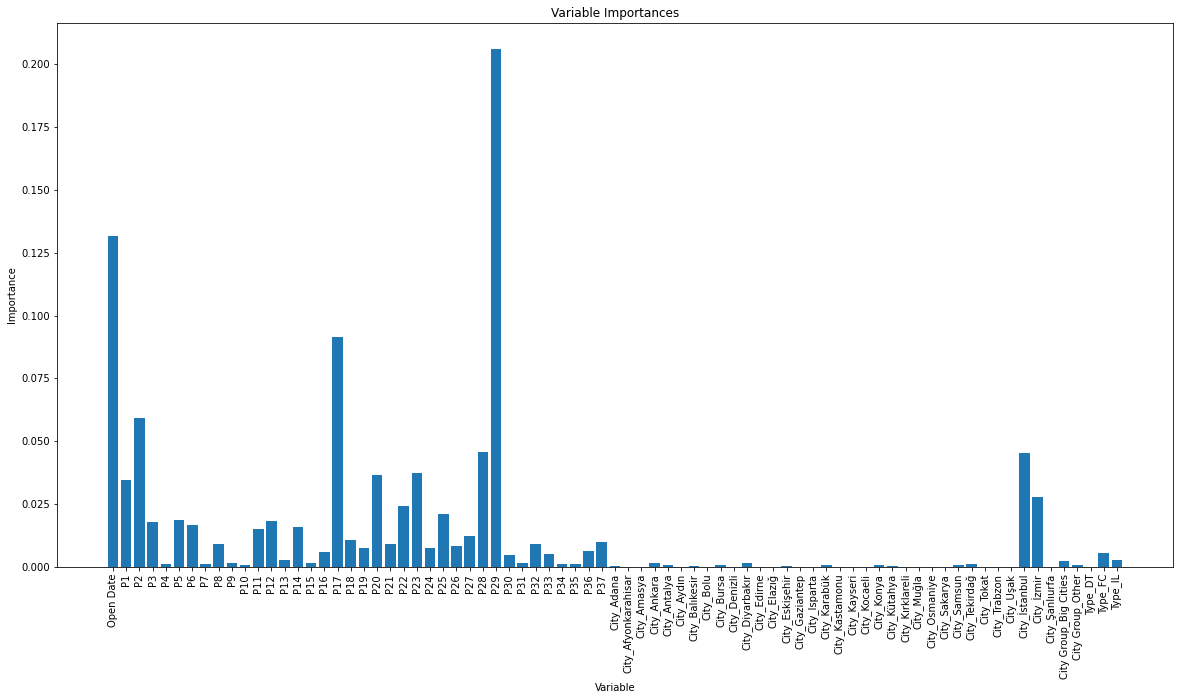

In [41]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
 
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
 
plt.xticks(x_values, feature_list, rotation='vertical')
 
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [42]:
X_train_2 = X_train.iloc[:,[0,1,2,3,5,6,11,12,14,17,18,20,22,23,25,27,28,29,69,70]]
X_train_2

,0,1,2,3,5,6,11,12,14,17,18,20,22,23,25,27,28,29,69,70
93,0.072323,0.181818,0.461538,0.533333,0.000000,0.111111,0.333333,0.250,0.333333,0.133333,0.333333,0.285714,0.50,0.000000,0.2,0.08,0.086957,0.266667,0.0,0.0
66,0.228249,0.090909,0.153846,0.533333,0.000000,0.000000,0.222222,0.375,0.000000,0.000000,0.000000,0.142857,0.00,0.041667,0.0,0.00,0.086957,0.400000,0.0,0.0
109,0.362386,0.090909,0.461538,0.400000,0.428571,0.444444,0.444444,0.250,0.000000,0.000000,0.000000,0.071429,0.00,0.000000,0.0,0.00,0.173913,0.266667,0.0,0.0
123,0.125483,0.000000,0.000000,0.533333,0.000000,0.000000,0.222222,0.375,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.086957,0.400000,0.0,0.0
42,0.131510,1.000000,1.000000,0.800000,0.428571,0.333333,0.555556,1.000,0.000000,0.000000,0.000000,1.000000,0.75,0.791667,0.0,0.00,0.565217,0.666667,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.392984,0.272727,0.615385,0.666667,0.142857,0.111111,0.222222,0.375,0.000000,0.000000,0.000000,0.285714,1.00,0.166667,0.0,0.00,0.260870,0.133333,0.0,0.0
79,0.225777,0.272727,0.615385,0.533333,0.000000,0.222222,0.000000,0.375,0.133333,0.133333,0.333333,0.142857,0.75,0.125000,0.3,0.16,0.086957,0.400000,0.0,0.0
133,0.411374,0.272727,0.615385,0.533333,0.142857,0.222222,0.444444,0.250,0.000000,0.000000,0.000000,0.071429,0.00,0.000000,0.0,0.00,0.173913,0.400000,0.0,1.0
72,0.252511,0.181818,0.615385,0.533333,0.142857,0.111111,0.444444,0.250,0.200000,0.066667,0.333333,0.285714,0.50,0.166667,0.2,0.24,0.347826,0.133333,0.0,1.0


In [43]:
X_test_2 = X_test.iloc[:,[0,1,2,3,5,6,11,12,14,17,18,20,22,23,25,27,28,29,69,70]]
X_test_2

,0,1,2,3,5,6,11,12,14,17,18,20,22,23,25,27,28,29,69,70
80,0.241385,0.272727,0.615385,0.533333,0.000000,0.222222,0.111111,0.375,0.000000,0.000000,0.000000,0.285714,1.00,0.083333,0.0,0.00,0.347826,0.133333,1.0,0.0
5,0.222995,0.454545,0.769231,0.600000,1.000000,1.000000,1.000000,0.750,0.000000,0.000000,0.000000,0.357143,0.00,0.166667,0.0,0.00,0.565217,0.666667,0.0,0.0
39,0.272601,0.272727,0.615385,0.533333,0.142857,0.222222,0.333333,0.250,0.266667,0.200000,0.250000,0.285714,0.25,0.041667,0.3,0.08,0.086957,0.266667,1.0,0.0
36,0.322516,0.181818,0.615385,0.666667,0.000000,0.444444,0.111111,0.375,0.000000,0.000000,0.000000,0.285714,0.75,0.083333,0.0,0.00,0.173913,0.400000,0.0,0.0
35,1.000000,0.272727,0.615385,0.533333,0.000000,0.111111,0.444444,0.250,0.133333,0.133333,0.333333,0.285714,0.50,0.166667,0.3,0.32,0.173913,0.266667,0.0,0.0
58,0.101066,0.181818,0.461538,0.533333,0.142857,0.111111,0.111111,0.375,0.000000,0.000000,0.000000,0.142857,0.50,0.000000,0.0,0.00,0.086957,0.400000,1.0,0.0
44,0.524030,0.090909,0.307692,0.666667,0.000000,0.444444,0.000000,0.375,0.066667,0.066667,0.333333,0.142857,0.25,0.000000,0.1,0.08,0.086957,0.400000,0.0,0.0
77,0.014217,0.181818,0.615385,0.400000,0.285714,0.333333,0.444444,0.250,0.000000,0.000000,0.000000,0.285714,0.50,0.000000,0.0,0.00,0.173913,0.266667,0.0,0.0
120,0.137691,0.090909,0.307692,0.533333,0.142857,0.111111,0.222222,0.375,0.000000,0.000000,0.000000,0.214286,0.25,0.083333,0.0,0.00,0.086957,0.400000,0.0,0.0
119,0.003400,0.272727,0.615385,0.533333,0.142857,0.222222,0.000000,0.375,0.000000,0.000000,0.000000,0.071429,0.00,0.000000,0.0,0.00,0.086957,0.400000,1.0,0.0


In [44]:
regressor_2 = RandomForestRegressor(n_estimators = 25, random_state = 0)
regressor_2.fit(X_train_2, y_train)

RandomForestRegressor(n_estimators=25, random_state=0)

In [45]:
y_pred_2 = regressor_2.predict(X_test_2)
y_pred_2

array([0.18728858, 0.16622339, 0.19699768, 0.11322145, 0.21169917,
       0.13659209, 0.11321355, 0.09145387, 0.13605918, 0.14476422,
       0.11808839, 0.15007336, 0.25235229, 0.14195071, 0.10025993,
       0.11658932, 0.18764772, 0.07975304, 0.15850114, 0.35610908,
       0.12233674, 0.30391926, 0.51764256, 0.16341761, 0.16972862,
       0.06686453, 0.16502584, 0.141217  ])

In [46]:
sq_error_2 = (y_test-y_pred_2)**2
sq_error_2

array([2.33464434e-03, 1.78906824e-03, 2.82359208e-03, 1.42662804e-04,
       3.99567375e-03, 1.33956503e-03, 2.99210018e-03, 2.57537407e-03,
       4.51726913e-04, 8.73085595e-06, 5.05086371e-03, 2.35979995e-02,
       1.65384632e-02, 5.70729404e-02, 2.62775964e-03, 3.77193837e-05,
       1.92245354e-02, 2.55772458e-02, 1.58298629e-02, 9.29835825e-03,
       5.06328496e-02, 4.84528400e-01, 1.59311798e-01, 1.83731307e-02,
       2.03120470e-02, 1.02844882e-06, 3.27245963e-05, 1.18449679e-02])

In [47]:
msq_error_2 = sq_error_2.mean()
msq_error_2

0.033512351163293104